## Carbon sources
A normal thing to do is to change the carbon sources in the medium and seeing what happens. Let's try!

In [1]:
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite

In [2]:
model = read_sbml_model('data/yeastGEM_het.xml')

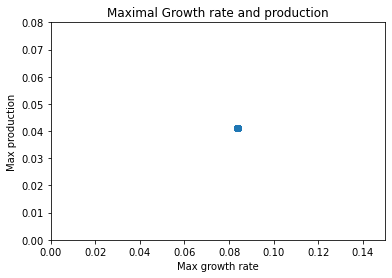

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# First, we will find all of the carbon sources in the exchange reactions
carbon = []
carbon_names = []
for reaction in model.exchanges:
    for metabolite in reaction.metabolites:
        if type(metabolite.elements.get('C')) == int:
            carbon.append(reaction)
            carbon_names.append(reaction.name)   # We are also saving thenames of the reactions for later


# Second, we can establish the baseline case for later reference
with model:
    max_base_growth = model.slim_optimize()
    model.objective = model.reactions.R07215
    max_base_production = model.slim_optimize()

    
# Now, we will loop through every carbon source in the model and see how good it produces.     
# We define the lists we are going to be using
max_growth = []
max_production = []

for i in range(0, len(carbon)):
    with model:
        model.medium['r_1714'] = 0    # Setting the existing carbons source to 0
        model.medium[carbon[i]] = 10  # Setting the testing carbon source to 10
        max_growth.append(model.slim_optimize(error_value=0.))  # Determining max growth
        model.objective = model.reactions.R07215
        max_production.append(model.slim_optimize(error_value=0.))  # Determining max production



    
# We can now collect all of the data in a dataframe
production = {'Carbon': carbon_names,
             'Growth': max_growth,
             'Production': max_production}
df = pd.DataFrame(production, columns = ['Carbon', 'Growth', 'Production'])


# And we can create a scatterplot of the production over growth to view the distrubution
plt.scatter(df.get('Growth'), df.get('Production'))
plt.xlabel('Max growth rate')
plt.ylabel('Max production')
plt.xlim(0, 0.15)
plt.ylim(0, 0.08)
plt.title('Maximal Growth rate and production')
plt.savefig("figures/carbon_sources")
plt.show()
